In [592]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
import scipy as sp
from sklearn.model_selection import train_test_split
'''
Genarating Dataset
'''
path = "./Data/C2T1_Train.csv"
data = pd.read_csv(path)


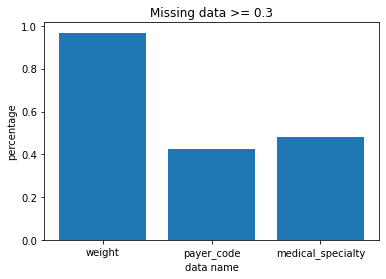

In [574]:
'''
Finding Missing Data
'''
lis = []
names = []
for col in data.columns:
    if data[col].dtype == object:
         if data[col][data[col] == '?'].count()/data.shape[0] > 0.3:
                lis.append(data[col][data[col] == '?'].count()/data.shape[0])
                names.append(col)
plt.bar(names, lis)
plt.xlabel('data name') 
plt.ylabel('percentage') 
plt.title("Missing data >= 0.3")
plt.show() 

In [575]:
data = data.drop(['encounter_id2', 'weight', 'payer_code', 'medical_specialty'], axis=1) #drop useless columns
data = data.drop_duplicates(subset= ['patient_nbr2'], keep = 'first') #remove duplicated patients
data = data.drop(['citoglipton', 'examide'], axis=1) #given values are all "No", so they are useless.

In [576]:
data

,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,48330653,Caucasian,Female,[80-90),2,1,4,13,68,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,63555809,Caucasian,Female,[90-100),3,3,4,12,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,42519137,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,82637321,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90756,140199364,Other,Female,[60-70),1,1,7,2,46,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
90758,120975184,Caucasian,Female,[80-90),1,1,7,5,76,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
90759,86472113,Caucasian,Male,[80-90),1,1,7,1,1,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
90761,100162346,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [577]:
'''
Dealing with Missing Values
'''
label_diag_1 = data[data['diag_1'] == '?'].index.values.tolist()
label_diag_2 = data[data['diag_2'] == '?'].index.values.tolist()
label_diag_3 = data[data['diag_3'] == '?'].index.values.tolist()
label_gender = data[data['gender'] == 'Unknown/Invalid'].index.values.tolist()
labels = list(set(label_diag_1+label_diag_2+label_diag_3+label_gender))
data = data.drop(labels=labels, axis=0)

data['race'].replace(to_replace = "?", value = np.nan, inplace=True)
data['race'].fillna(method ='pad', inplace=True)

In [578]:
'''
Feature Engineering
'''
# combining features and reduce/add columns.
data['number_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
data = data.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1)
data['total_procedures'] = data['num_lab_procedures'] + data['num_procedures'] 
# data = data.drop(['num_lab_procedures', 'num_procedures'], axis=1)


In [579]:
def modifDiag(name):
    for index, row in tqdm(data.iterrows()):
        if "V" in str(row[name]) or "E" in str(row[name]):
            data.loc[index, name] = 1
        elif 139 >= float(row[name]) >= 1:
            data.loc[index, name] = 2
        elif 239 >= float(row[name]) >= 140:
            data.loc[index, name] = 3
        elif 279 >= float(row[name]) >= 240:
            data.loc[index, name] = 4
        elif 289 >= float(row[name]) >= 280:
            data.loc[index, name] = 5
        elif 319 >= float(row[name]) >= 290:
            data.loc[index, name] = 6
        elif 359 >= float(row[name]) >= 320:
            data.loc[index, name] = 7
        elif 389 >= float(row[name]) >= 360:
            data.loc[index, name] = 8
        elif 459 >= float(row[name]) >= 390:
            data.loc[index, name] = 9
        elif 519 >= float(row[name]) >= 460:
            data.loc[index, name] = 10
        elif 579 >= float(row[name]) >= 520:
            data.loc[index, name] = 11
        elif 629 >= float(row[name]) >= 580:
            data.loc[index, name] = 12
        elif 679 >= float(row[name]) >= 630:
            data.loc[index, name] = 13
        elif 709 >= float(row[name]) >= 680:
            data.loc[index, name] = 14
        elif 739 >= float(row[name]) >= 710:
            data.loc[index, name] = 15
        elif 759 >= float(row[name]) >= 740:
            data.loc[index, name] = 16
        elif 779 >= float(row[name]) >= 760:
            data.loc[index, name] = 17
        elif 799 >= float(row[name]) >= 780:
            data.loc[index, name] = 18
        else:
            data.loc[index, name] = 19

modifDiag('diag_1')
modifDiag('diag_2')
modifDiag('diag_3')


64525it [00:09, 6931.09it/s]
64525it [00:08, 7230.65it/s]
64525it [00:08, 7378.60it/s]


In [580]:
data

,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,number_visits,total_procedures
0,48330653,Caucasian,Female,[80-90),2,1,4,13,68,2,...,No,No,No,No,No,Ch,Yes,NO,0,70
1,63555809,Caucasian,Female,[90-100),3,3,4,12,33,3,...,No,No,No,No,No,Ch,Yes,NO,0,36
2,42519137,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,No,No,No,Ch,Yes,NO,0,51
3,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,...,No,No,No,No,No,No,Yes,>30,0,49
4,82637321,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,No,No,No,No,No,Yes,>30,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90756,140199364,Other,Female,[60-70),1,1,7,2,46,6,...,No,No,No,No,No,No,Yes,>30,3,52
90758,120975184,Caucasian,Female,[80-90),1,1,7,5,76,1,...,No,No,No,No,No,Ch,Yes,NO,1,77
90759,86472113,Caucasian,Male,[80-90),1,1,7,1,1,0,...,No,No,No,No,No,Ch,Yes,NO,3,1
90761,100162346,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,No,No,No,No,Ch,Yes,>30,0,51


In [581]:
'''
Shorten the Range
'''
data['discharge_disposition_id'].replace(to_replace=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=(1, 1, 1, 1, 1, 1, 1, 1, 1), inplace=True)
data['discharge_disposition_id'].replace(to_replace=(10, 11, 12, 13, 14, 15, 16, 17, 18), value=(2, 2, 2, 2, 2, 2, 2, 2, 2), inplace=True)
data['discharge_disposition_id'].replace(to_replace=(19, 20, 21, 22, 23, 24, 25, 26, 27, 28), value=(3, 3, 3, 3, 3, 3, 3, 3, 3, 3), inplace=True)
data['admission_source_id'].replace(to_replace=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 20, 22, 25), value=(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3), inplace=True)
data['admission_type_id'].replace(to_replace=(1, 2, 3, 4, 5, 6, 7, 8), value=(1, 1, 1, 2, 2, 2, 3, 3), inplace=True)

In [582]:
'''
Tokenization
'''
data['change'].replace(to_replace=('No','Ch'), value=(0, 1), inplace=True)
data['gender'].replace(to_replace=('Female', 'Male'), value=(0, 1), inplace=True) 
data['diabetesMed'].replace(to_replace=('No','Yes'), value=(0, 1), inplace=True)
indexName = data.columns.tolist()
data.replace(to_replace=('No','Steady','Up', 'Down'), value=(0, 0, 1, 1), inplace=True)
data['A1Cresult'].replace(to_replace=('None', '>7', '>8', 'Norm'), value=(-999, 1, 1, 0), inplace=True)
data['max_glu_serum'].replace(to_replace=('None', '>300', 'Norm', '>200'), value=(-999, 1, 0, 1), inplace=True)
data.replace(to_replace=('[90-100)', '[80-90)', '[40-50)', '[50-60)', '[60-70)', '[70-80)',
       '[20-30)', '[10-20)', '[30-40)', '[0-10)'), value=(10, 9, 5, 6, 7, 8, 3, 2, 4, 1), inplace=True)
data['readmitted'].replace(to_replace=('NO','>30','<30'), value=(0, 1, 1), inplace=True) 
# types = tuple(data['race'].unique())
# data['race'].replace(to_replace = types, value = tuple([i for i in range(len(types))]), inplace=True)
data['severity'] = 0
indexName = data.columns.tolist()
for medic in indexName[14:35]:
    data['severity'] = data['severity'] + data[medic]
data['patient_nbr2'] = data['patient_nbr2'].astype('int64') 


'''
Dummies
'''
data = pd.get_dummies(data, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult'], drop_first = True)
just_dummies = pd.get_dummies(data['race'])
data = pd.concat([data, just_dummies], axis=1)      
data.drop(['race'], inplace=True, axis=1)


In [583]:
# interactionterms = [('num_medications','time_in_hospital'),
# ('num_medications','num_procedures'),
# ('time_in_hospital','num_lab_procedures'),
# ('num_medications','num_lab_procedures'),
# ('num_medications','number_diagnoses'),
# ('age','number_diagnoses'),
# ('change','num_medications'),
# ('number_diagnoses','time_in_hospital'),
# ('num_medications','severity')]
# for inter in interactionterms:
#     name = inter[0] + '|' + inter[1]
#     data[name] = data[inter[0]] * data[inter[1]]


In [584]:
'''
Using Log Transform to remove Skewness.
'''
features = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
for i in features:
    skewval = data[i].skew()
    kurtval = data[i].kurtosis()    
    if (abs(skewval) > 2) & (abs(kurtval) > 2):
        if len(data[data[i] == 0])/len(data) <= 0.02:
            data[i] = np.log(data[i])
        else:
            data[i] = np.log1p(data[i])



In [585]:
'''
Standarization
'''
indexName = data.columns.tolist()
for col in indexName:
    if col != "readmitted":
        data[col] = preprocessing.StandardScaler().fit_transform(data[[col]].values)
# data = data[(np.abs(sp.stats.zscore(data[features])) < 3).all(axis=1)]
        

In [586]:
data

,patient_nbr2,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,...,admission_source_id_3,max_glu_serum_0,max_glu_serum_1,A1Cresult_0,A1Cresult_1,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,-0.158070,1.218556,2.919827,1.244617,0.319870,1.477966,-0.242096,0.092846,-1.362572,0.360956,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,-0.476289,-0.086914,0.548168,-0.14917,-0.130981
1,0.220509,1.861803,2.582832,-0.498292,0.887720,0.271044,-0.242096,-1.319378,0.476368,0.360956,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,-0.476289,-0.086914,0.548168,-0.14917,-0.130981
2,-0.302575,-1.354433,-1.124114,0.398061,-0.815829,-0.935878,-1.531438,-1.319378,-0.902837,-1.220683,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,-0.476289,-0.086914,0.548168,-0.14917,-0.130981
3,0.874793,-1.354433,1.571846,0.198872,0.319870,0.150352,-1.316548,0.092846,2.545175,0.888169,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,2.099567,-0.086914,-1.824260,-0.14917,-0.130981
4,0.694977,-0.711186,-0.450124,-0.597887,2.591268,0.029660,-0.242096,0.092846,-0.902837,0.888169,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,-0.476289,-0.086914,0.548168,-0.14917,-0.130981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90756,2.126277,-0.067938,-0.787119,0.149074,2.591268,0.150352,1.906807,0.798958,0.246501,0.888169,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,-0.476289,-0.086914,-1.824260,-0.14917,7.632812
90758,1.648261,1.218556,0.223866,1.642997,-0.247979,0.753813,-0.886767,-1.554749,-0.443102,0.888169,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,-0.476289,-0.086914,0.548168,-0.14917,-0.130981
90759,0.790330,1.218556,-1.124114,-2.091809,-0.815829,-0.091032,-0.242096,2.211182,-0.902837,-0.166257,...,-0.286377,-0.162598,-0.161133,-0.230713,-0.376221,-0.476289,-0.086914,0.548168,-0.14917,-0.130981
90761,1.130743,0.575309,-0.450124,0.398061,-0.815829,0.029660,-1.316548,-0.613266,0.246501,0.888169,...,-0.286377,-0.162598,-0.161133,-0.230713,2.658203,2.099567,-0.086914,-1.824260,-0.14917,-0.130981


In [587]:
'''
Spliting Data
'''
features = list(set(list(data.columns))- {'readmitted'})
X = data[features]
y = data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [588]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100, ), max_iter=15, alpha=1e-4, batch_size=100,
                    solver='adam', verbose=10, learning_rate_init=.01)
mlp.fit(X_train, y_train)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)


Iteration 1, loss = 0.65660765
Iteration 2, loss = 0.64353711
Iteration 3, loss = 0.64001802
Iteration 4, loss = 0.64018676
Iteration 5, loss = 0.63776428
Iteration 6, loss = 0.63447585
Iteration 7, loss = 0.63359183
Iteration 8, loss = 0.63202261
Iteration 9, loss = 0.63144656
Iteration 10, loss = 0.63036425
Iteration 11, loss = 0.63056675
Iteration 12, loss = 0.62989936
Iteration 13, loss = 0.62976287
Iteration 14, loss = 0.62957563
Iteration 15, loss = 0.62902099


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=100, learning_rate_init=0.01, max_iter=15, verbose=10)

In [590]:
y_pred = mlp.predict(X_test)

In [591]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
print("########## Test ###########")
print("Accu.:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("F1:", f1_score(y_test, y_pred, average="macro"))
print("MSE:", mean_squared_error(y_test, y_pred))

########## Test ###########
Accu.: 0.6344827586206897
Recall: 0.5993154248035877
Precision: 0.6146337095138424
F1: 0.5986907046068526
MSE: 0.36551724137931035


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

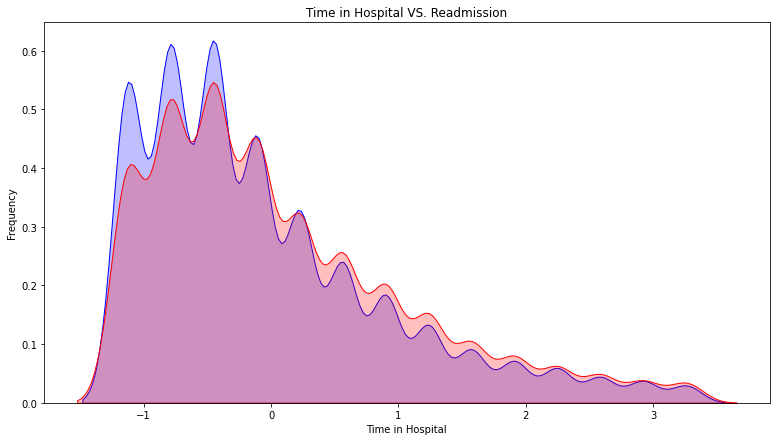

In [532]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')